## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
train_dir = r'C:\Users\Dennis\Desktop\DL0320EN\train'
validation_dir = r'C:\Users\Dennis\Desktop\DL0320EN\valid'
test_dir =r'C:\Users\Dennis\Desktop\DL0320EN\test'

In [3]:
cl = ['5', '10', '20', '50', '100', '200', '500']

In [4]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=5,
        class_mode='categorical',
        classes = cl,
        seed = 0
        )

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=5,
        class_mode='categorical',
        classes = cl,
        seed = 0
        )




Found 70 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [5]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
conv_base.trainable = False

In [8]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(7,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 7)                 175623    
Total params: 14,890,311
Trainable params: 175,623
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
checkpoint = ModelCheckpoint("vgg16.h5",monitor='val_loss',verbose=1,save_best_only=True)

In [12]:
early = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1)

In [13]:
history = model.fit_generator(generator=train_generator,steps_per_epoch=5,epochs=20,verbose=1,
                             validation_data=validation_generator,validation_steps=5,callbacks=[checkpoint,early])

Epoch 1/20
4/5 [=======================>......] - ETA: 8s - loss: 2.9290 - accuracy: 0.3000 
Epoch 00001: val_loss improved from inf to 2.96209, saving model to vgg16.h5
5/5 [==============================] - 53s 11s/step - loss: 2.7933 - accuracy: 0.3200 - val_loss: 2.9621 - val_accuracy: 0.2800
Epoch 2/20
4/5 [=======================>......] - ETA: 8s - loss: 2.4599 - accuracy: 0.5000 
Epoch 00002: val_loss improved from 2.96209 to 1.82171, saving model to vgg16.h5
5/5 [==============================] - 53s 11s/step - loss: 2.5499 - accuracy: 0.4800 - val_loss: 1.8217 - val_accuracy: 0.3600
Epoch 3/20
4/5 [=======================>......] - ETA: 8s - loss: 1.1855 - accuracy: 0.7000 
Epoch 00003: val_loss improved from 1.82171 to 0.72562, saving model to vgg16.h5
5/5 [==============================] - 53s 11s/step - loss: 1.0906 - accuracy: 0.6800 - val_loss: 0.7256 - val_accuracy: 0.7200
Epoch 4/20
4/5 [=======================>......] - ETA: 8s - loss: 0.4217 - accuracy: 0.8500 
Epoch

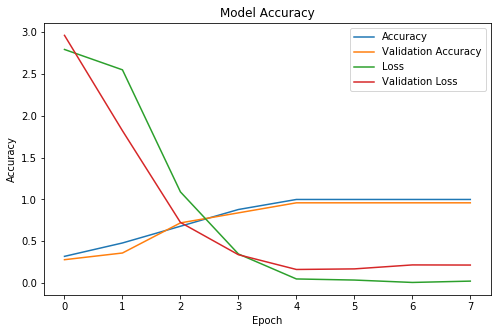

In [14]:
#Plot Graph to see the result
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [15]:
#Save the model
#model.save('vgg16.h5')

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=5,
        class_mode='categorical',
        classes = cl,
        seed = 0,
        shuffle=False)

Found 70 images belonging to 7 classes.


In [21]:
len(test_generator)

14

In [22]:
vgg = model

In [23]:
vggloss = vgg.evaluate_generator(test_generator,steps=14,verbose=1)

14/14 [==============================] - 33s 2s/step - loss: 0.1755 - accuracy: 0.9429


In [24]:
vggloss

[0.17546221284387034, 0.94285715]

In [26]:
vgg.metrics_names

['loss', 'accuracy']

In [27]:
print("Accuracy for VGG16 is %.2f%%" % (vggloss[1]*100))

Accuracy for VGG16 is 94.29%


## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [ ]:
vgg_predict = vgg.predict_generator(generator=test_generator,steps=14,verbose=1)

In [ ]:
vgg_predict

In [ ]:
len(vgg_predict)

In [ ]:
np.round(a=vgg_predict,decimals=3)

In [ ]:
classes = np.round(a=vgg_predict,decimals=3)

In [ ]:
classes

In [ ]:
filenames=test_generator.filenames
filenames

In [ ]:
results = pd.DataFrame({"file": filenames,"prediction":vgg_predict[:,0],"class":classes[:,0]})

In [ ]:
results

**Assumption is prediction > 0.5 , class is 1 else prediction < 0.5, class is 0**

### Method 2: Sampling 5 images randomly and predict class

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img1 = image.load_img("19751.jpg",target_size=(224,224,3,1))

# img1 = tf.cast(img1, tf.float32)
img1 = np.asarray(img1)

plt.imshow(img1)
#img1 = np.expand_dims(img1, axis=0)

output1 = vgg16.predict(img1)
print(output1)

if output1[0][1] == 0:
    print("negative")
else:
    print('positive')

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).